# Chestnut Bun Problem (Notebook)

This notebook explores the exponential growth of chestnut buns when they double every 5 minutes.

It follows the same steps as in the README:
- Define assumptions
- Derive formula
- Calculate time to fill the solar system
- Visualize the growth

Saved plot to figures/growth.png


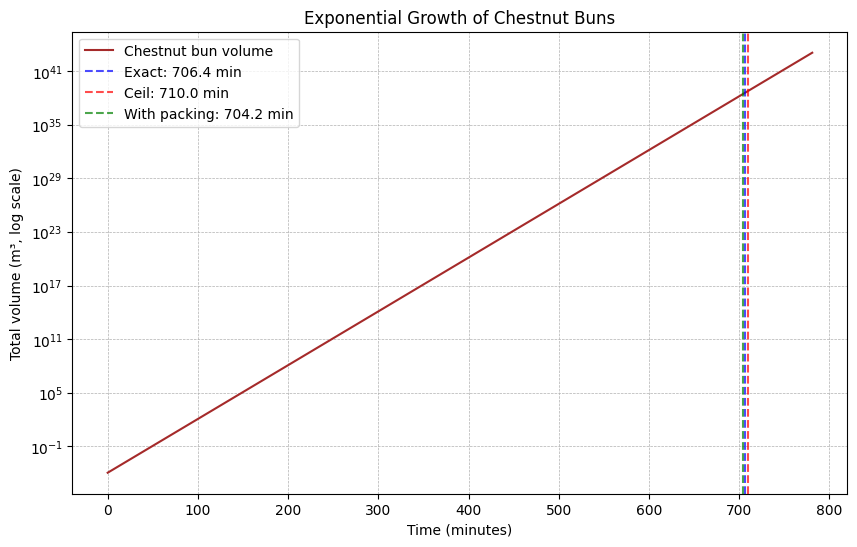

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Constants
V0 = 1.13e-4  # m^3 (single bun volume)
Vsolar = 3.81e38  # m^3 (solar system volume)
dt = 5.0  # minutes
packing_fraction = 0.74048

# Functions
def V(t): return V0 * 2**(t/dt)

def compute_times():
    n_real = math.log2(Vsolar / V0)
    T_real = n_real * dt

    n_int = math.ceil(n_real)
    T_int = n_int * dt

    # Packing adjustment
    Vtarget_packed = Vsolar * packing_fraction
    n_packed = math.log2(Vtarget_packed / V0)
    T_packed = n_packed * dt
    T_packed_int = math.ceil(n_packed) * dt

    return {
        "n_real": n_real,
        "T_real": T_real,
        "n_int": n_int,
        "T_int": T_int,
        "n_packed": n_packed,
        "T_packed": T_packed,
        "T_packed_int": T_packed_int,
    }

# Main
res = compute_times()
T_max = res["T_int"] * 1.1  # plot a bit beyond

t_vals = np.linspace(0, T_max, 400)
V_vals = V(t_vals)

plt.figure(figsize=(10,6))
plt.semilogy(t_vals, V_vals, label="Chestnut bun volume", color="brown")

# Annotations
for key, color, label in [
    ("T_real", "blue", "Exact"),
    ("T_int", "red", "Ceil"),
    ("T_packed", "green", "With packing"),
]:
    T = res[key]
    plt.axvline(T, color=color, linestyle="--", alpha=0.7,
                label=f"{label}: {T:.1f} min")

# Labels & Title
plt.xlabel("Time (minutes)")
plt.ylabel("Total volume (m³, log scale)")
plt.title("Exponential Growth of Chestnut Buns")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)

# Save
os.makedirs("figures", exist_ok=True)
outpath = "figures/growth.png"
plt.savefig(outpath, dpi=150)
print(f"Saved plot to {outpath}")
